<a href="https://colab.research.google.com/github/TheresaZhu21/learning/blob/main/pandas_casual_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
  'surname': ['Hargrave', 'Hill', 'Boni', 'Obinna', 'Onio'],
  'geography': ['France', 'Spain', 'France', 'Germany', 'France'],
  'credit_score': [619, 608, 699, 699, 502],
  'age': [42, 41, 39, 29, np.nan],
  'exited': [True, False, True, True, False]
  })
df = df.set_index(['surname', 'geography'])
df

,,credit_score,age,exited
surname,geography,,,
Hargrave,France,619,42.0,True
Hill,Spain,608,41.0,False
Boni,France,699,39.0,True
Obinna,Germany,699,29.0,True
Onio,France,502,NaN,False


In [3]:
df.loc[[('Boni', 'France'), ('Obinna', 'Germany')]]

,,credit_score,age,exited
surname,geography,,,
Boni,France,699,39.0,True
Obinna,Germany,699,29.0,True


In [4]:
df.isna().sum()

credit_score    0
age             1
exited          0
dtype: int64

In [5]:
df.index.get_level_values(1).value_counts(normalize = True)

France     0.6
Spain      0.2
Germany    0.2
Name: geography, dtype: float64

In [6]:
df.sort_index(level=['geography', 'surname'], ascending=[True, False])

,,credit_score,age,exited
surname,geography,,,
Onio,France,502,NaN,False
Hargrave,France,619,42.0,True
Boni,France,699,39.0,True
Obinna,Germany,699,29.0,True
Hill,Spain,608,41.0,False


In [7]:
def range(column):
  return column.max() - column.min()
df[['credit_score', 'age']].agg(range)

credit_score    197.0
age              13.0
dtype: float64

<Axes: xlabel='geography'>

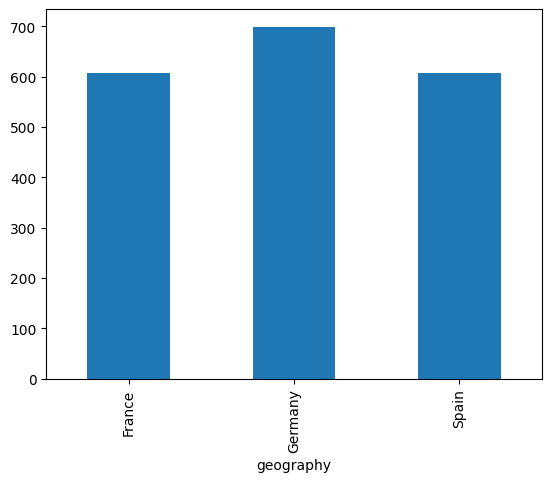

In [8]:
df.groupby("geography")["credit_score"].mean().plot(kind = "bar")

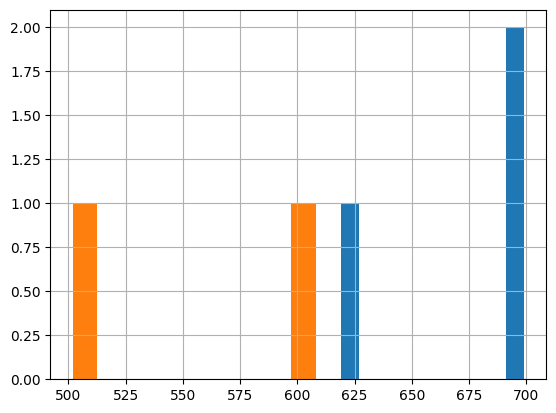

In [9]:
df[df["exited"]==True]["credit_score"].hist()
df[df["exited"]==False]["credit_score"].hist()
plt.show()